<a href="https://colab.research.google.com/github/Sans2326/CUREYA_TASKS/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STOCK PRICE PREDICTION - **APPLE**

In [1]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

In [2]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers import Dense, LSTM
from keras.models import Sequential
import matplotlib.pyplot as plt

In [3]:
ds = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')

## Data Visualization

In [4]:
ds.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.610315
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.678085
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.818838
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.952841
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.932299


In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2003 entries, 2012-01-03 to 2019-12-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2003 non-null   float64
 1   Low        2003 non-null   float64
 2   Open       2003 non-null   float64
 3   Close      2003 non-null   float64
 4   Volume     2003 non-null   float64
 5   Adj Close  2003 non-null   float64
dtypes: float64(6)
memory usage: 109.5 KB


In [6]:
ds.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2003.000000,2003.000000,2003.000000,2003.000000,2.003000e+03,2003.000000
mean,31.798525,31.238634,31.519792,31.527449,2.384275e+08,29.523361
std,12.507078,12.308627,12.398193,12.419818,1.875556e+08,12.795978
min,14.271429,13.753571,13.856071,13.947500,4.544800e+07,12.152316
25%,21.662499,21.228750,21.441607,21.492857,1.104316e+08,18.624002
50%,28.504999,27.915001,28.205000,28.230000,1.747996e+08,26.091917
75%,41.484999,40.531250,40.961250,40.992500,2.992836e+08,39.260998
max,70.442497,69.699997,69.892502,70.102501,1.506120e+09,69.177261


Text(0, 0.5, 'closing Price---->')

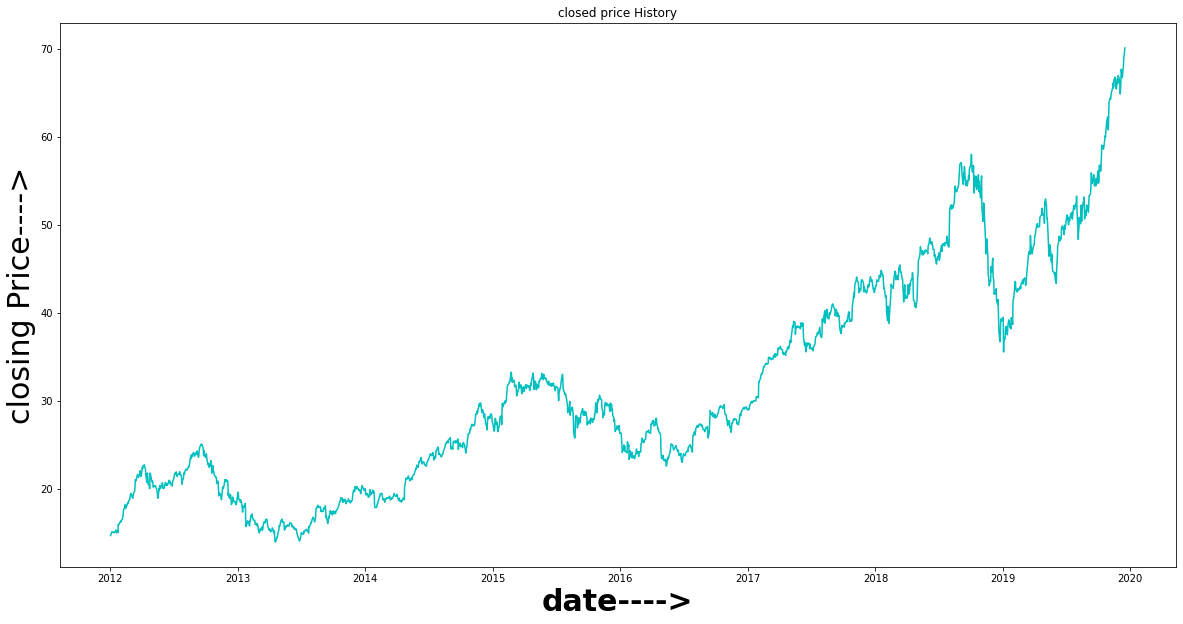

In [7]:
plt.figure(figsize=(20,10))
plt.title('closed price History')
plt.plot(ds['Close'], color='c')
plt.xlabel('date---->',fontsize=30, fontweight='bold')
plt.ylabel('closing Price---->',fontsize=30)

Text(0, 0.5, 'Opening Price')

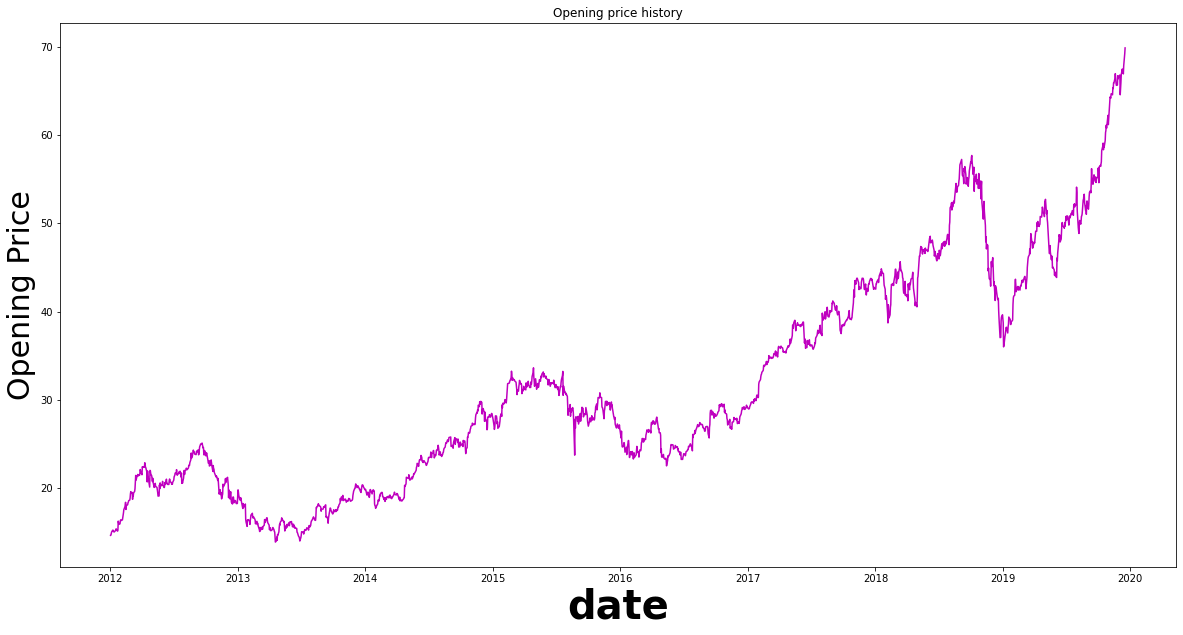

In [10]:
plt.figure(figsize=(20,10))
plt.title('Opening price history')
plt.plot(ds['Open'], color='m')
plt.xlabel('date',fontsize=40, fontweight='bold')
plt.ylabel('Opening Price',fontsize=30)

Text(0, 0.5, 'Opening Price history')

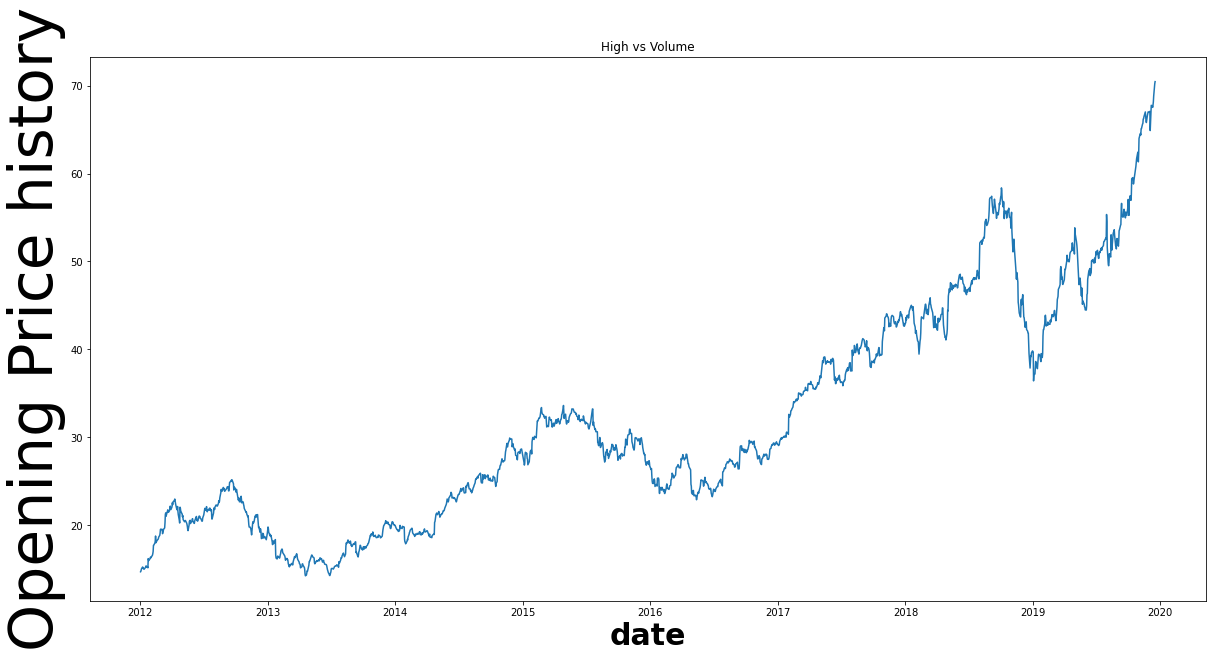

In [9]:
plt.figure(figsize=(20,10))
plt.title('High vs Volume')
plt.plot(ds['High'])
plt.xlabel('date',fontsize=30, fontweight='bold')
plt.ylabel('Opening Price',fontsize=60)

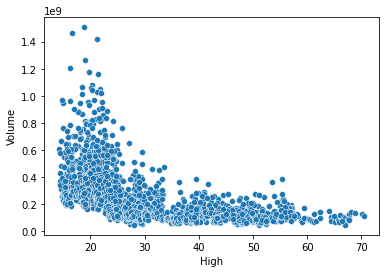

In [13]:
sns.scatterplot(data=ds, x="High", y="Volume")

In [16]:
corr = ds.corr()
corr

,High,Low,Open,Close,Volume,Adj Close
High,1.000000,0.999646,0.999775,0.999739,-0.559032,0.999139
Low,0.999646,1.000000,0.999709,0.999763,-0.567760,0.999149
Open,0.999775,0.999709,1.000000,0.999480,-0.562159,0.998855
Close,0.999739,0.999763,0.999480,1.000000,-0.563906,0.999379
Volume,-0.559032,-0.567760,-0.562159,-0.563906,1.000000,-0.570675
Adj Close,0.999139,0.999149,0.998855,0.999379,-0.570675,1.000000


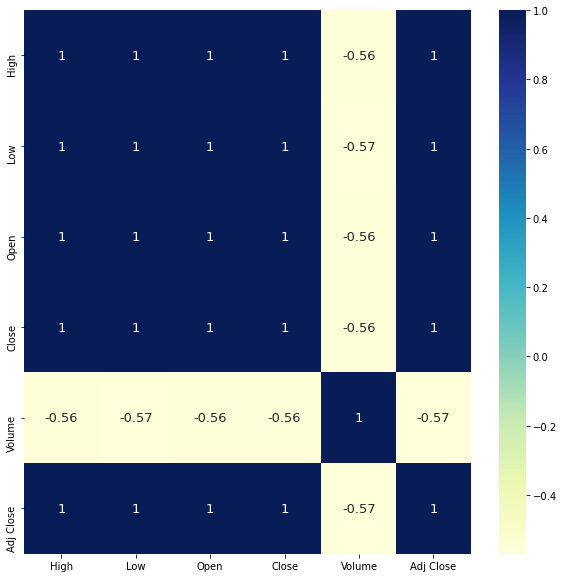

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, annot_kws={"size":13}, cmap="YlGnBu" )

In [19]:
data = ds.filter(['Close'])
data2 = data.values
print(data2)

[[14.6867857 ]
 [14.76571369]
 [14.92964268]
 ...
 [68.78749847]
 [69.96499634]
 [70.10250092]]


In [20]:
training_data_size = math.ceil(len(data2)*.8)
training_data_size

1603

In [21]:
#scaling the data
scaler = MinMaxScaler(feature_range=(0,1)) #creates a scaler instance to rescale all data to the range of 0 to 1

scaled_data = scaler.fit_transform(data2) #creates the actual training set of scaled values
print(scaled_data.shape)
print(scaled_data)

(2003, 1)
[[0.01316509]
 [0.01457063]
 [0.01748985]
 ...
 [0.97658263]
 [0.99755134]
 [1.        ]]


In [22]:
train_data = scaled_data[0:training_data_size, :]
print(len(train_data))
x_train, y_train = [], []
for i in range(100, len(train_data)):
    x_train.append(train_data[i-100:i, 0])
    y_train.append(train_data[i,0])
    if i<=100:
       print(x_train)
       print(y_train)
       print()

1603
[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01893355, 0.02345548, 0.01900352,
       0.03569838, 0.03440732, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814049, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661394,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632778, 0.09835024, 0.10269409, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701237, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805,
       0.13949272, 0.13293563, 0.14507041, 0.15186917, 0.14868284,
       0.15464214, 0.1562639 , 0.15130952, 0.14988489, 0.14770341,
       0.13654806, 0.12058461, 0.13939096, 0.13852602, 0

In [26]:
testing_data = scaled_data[training_data_size: , :]
print(len(testing_data))
x_test, y_test = [], []

for i in range(100, len(testing_data)):
  x_test.append(testing_data[i-100:i, 0])
  y_test.append(train_data[i,0])
  if i<=101:
    print(x_test)
    print(y_test)

400
[array([0.5840976 , 0.58107023, 0.58694685, 0.58485443, 0.59019677,
       0.58926183, 0.59117621, 0.58814884, 0.58636808, 0.58356332,
       0.59856648, 0.60564509, 0.61223397, 0.61521678, 0.61290181,
       0.60506631, 0.60297388, 0.60764846, 0.60061435, 0.60105957,
       0.59233369, 0.59188854, 0.57831003, 0.58191611, 0.5772861 ,
       0.574882  , 0.5626391 , 0.57270052, 0.57149854, 0.57746415,
       0.57572789, 0.58494342, 0.57043004, 0.57701893, 0.58846051,
       0.60008013, 0.5990562 , 0.58805984, 0.6020835 , 0.6034191 ,
       0.60154929, 0.60395332, 0.59927874, 0.6058677 , 0.60390882,
       0.60466565, 0.61085388, 0.61895648, 0.61624078, 0.60186089,
       0.59709732, 0.59878902, 0.64869556, 0.67491762, 0.67758883,
       0.68239696, 0.67367108, 0.67429435, 0.68155107, 0.6755409 ,
       0.68150651, 0.68542426, 0.68760575, 0.7013178 , 0.72028314,
       0.710845  , 0.70897512, 0.70901968, 0.71097855, 0.71396136,
       0.72188585, 0.72972128, 0.74432371, 0.75345025, 0.

In [23]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1], 1))
print(x_train.shape, y_train.shape)

(1503, 100, 1) (1503,)


In [27]:
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
print(x_test.shape, y_test.shape)

(300, 100, 1) (300,)


## Predicting Stock Price using RNN

In [28]:
#initialising the RNN as a sequence of layers
reg = Sequential()

In [29]:
#adding the input layer and LSTM layer
reg.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))

In [30]:
#adding the LSTM layer
reg.add(LSTM(50, return_sequences=True))
reg.add(LSTM(50))
reg.add(Dense(1))

In [31]:
#compiling the RNN
reg.compile(optimizer='adam', loss='mean_squared_error')

In [32]:
reg.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


### Training the LSTM model

In [33]:
lstm_model = reg.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size = 64, epochs=80, verbose=1)

Epoch 1/80
24/24 [==============================] - 10s 203ms/step - loss: 0.0179 - val_loss: 0.3527
Epoch 2/80
24/24 [==============================] - 4s 160ms/step - loss: 0.0012 - val_loss: 0.3454
Epoch 3/80
24/24 [==============================] - 4s 160ms/step - loss: 5.0704e-04 - val_loss: 0.3363
Epoch 4/80
24/24 [==============================] - 4s 161ms/step - loss: 4.8863e-04 - val_loss: 0.3294
Epoch 5/80
24/24 [==============================] - 4s 160ms/step - loss: 4.9494e-04 - val_loss: 0.3320
Epoch 6/80
24/24 [==============================] - 4s 160ms/step - loss: 4.6549e-04 - val_loss: 0.3360
Epoch 7/80
24/24 [==============================] - 4s 160ms/step - loss: 4.6257e-04 - val_loss: 0.3493
Epoch 8/80
24/24 [==============================] - 4s 160ms/step - loss: 4.6210e-04 - val_loss: 0.3218
Epoch 9/80
24/24 [==============================] - 4s 160ms/step - loss: 4.4224e-04 - val_loss: 0.3302
Epoch 10/80
24/24 [==============================] - 4s 159ms/step - lo

Making Predictions

In [35]:
train_predictions = reg.predict(x_train)
test_predictions = reg.predict(x_test)

In [36]:
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

In [38]:
print(train_predictions.shape)
print(test_predictions.shape)

(1503, 1)
(300, 1)


Using an evaluation matrix

In [39]:
math.sqrt(mean_squared_error(y_train,train_predictions))

28.42775854900514

In [41]:
math.sqrt(mean_squared_error(y_test,test_predictions))

51.459219800445986

Visualizing Predictions

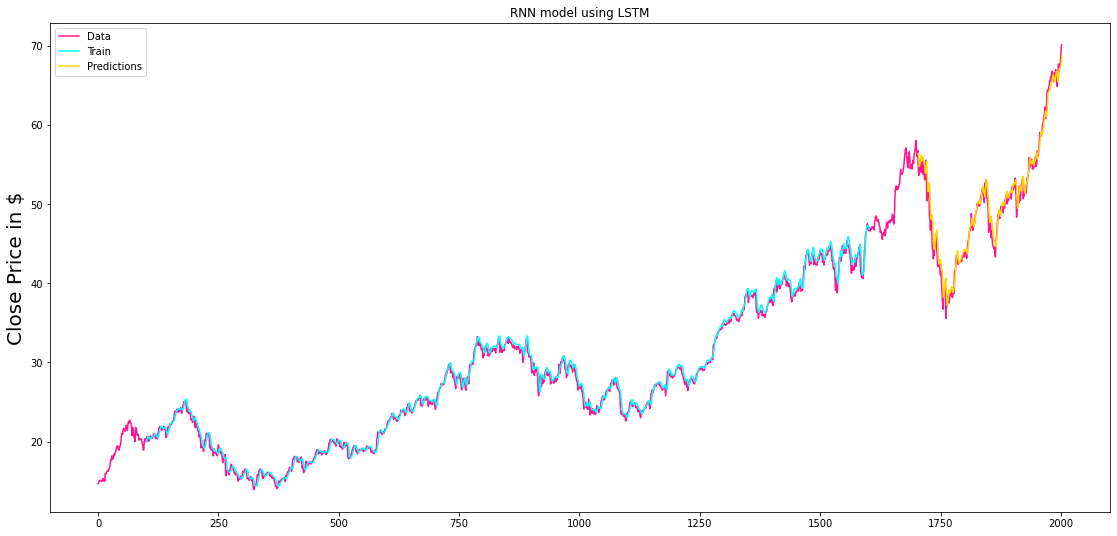

In [49]:
# train predictions
train_prediction_plot = np.empty_like(data2)
train_prediction_plot[:, :] = np.nan
train_prediction_plot[100:len(train_predictions)+100, :] = train_predictions

# test predictions
test_prediction_plot = np.empty_like(data2)
test_prediction_plot[:] = np.nan
test_prediction_plot[len(train_predictions)+(100*2):len(data2), :] = test_predictions

plt.figure(figsize = (19,9))
plt.title('RNN model using LSTM')
plt.ylabel('Close Price in $', fontsize = 20)

plt.plot(data2,color='deeppink')
plt.plot(train_prediction_plot,color='aqua')
plt.plot(test_prediction_plot,color="gold")
plt.legend(['Data', 'Train', 'Predictions'], loc='upper left')
plt.show()